## Observations and Insights

- According to the bar chart, each treatment regimen was performed on 25 mice, except for Stelasyn which was done on 24. This was likely done to keep data consistent across all treatment regimens.

- The gender breakdown across all mice is fairly even, which was likely intentional by those who ran the study. There do not appear to be significant differences regarding treatment across genders.

- The pearson correlation between both factors is 0.84, which is fairly high. This would indicate that weight and tumor volume are likely correlated, at least based on this data set. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = merged_df.groupby("Drug Regimen")['Tumor Volume (mm3)']
drug_group_mean = drug_group.mean()
drug_group_median = drug_group.median()
drug_group_var = drug_group.var()
drug_group_std = drug_group.std()
drug_group_sem = drug_group.sem()

In [3]:
drug_df = pd.DataFrame(pd.concat({'Mean': drug_group_mean, 'Median': drug_group_median, 'Variance': drug_group_var, 'STD': drug_group_std, 'SEM': drug_group_sem}, axis=1))
drug_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

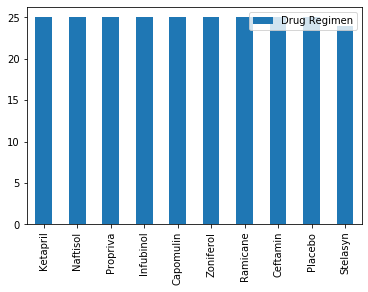

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
no_dup_df = merged_df.drop_duplicates('Mouse ID', keep='first')
data_points = pd.DataFrame(no_dup_df['Drug Regimen'].value_counts())
data_points.plot.bar()

<BarContainer object of 10 artists>

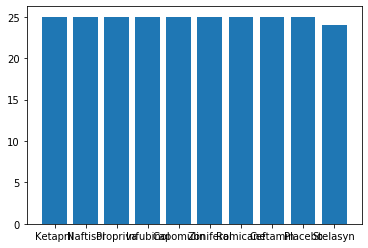

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(data_points.index, data_points['Drug Regimen'])

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000254AF262AC8>],
      dtype=object)

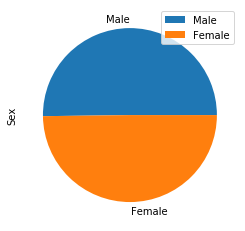

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(no_dup_df['Sex'].value_counts())
gender_df.plot.pie(subplots=True)

([<matplotlib.patches.Wedge at 0x254af2e9c88>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

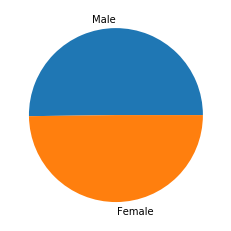

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels=gender_df.index)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
most_promising_drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
final_vol_df = merged_df.sort_values('Timepoint').groupby('Mouse ID').tail(1)
final_vol_df.query("`Drug Regimen` == @most_promising_drugs", inplace=True)
final_vol_df.sort_values('Drug Regimen', inplace=True)
final_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
64,f966,Capomulin,Male,16,17,20,30.485985,0
19,s185,Capomulin,Female,3,17,45,23.343598,1
317,j246,Capomulin,Female,21,21,35,38.753265,1
244,g288,Capomulin,Male,3,19,45,37.074024,1
224,w914,Capomulin,Male,24,21,45,36.041047,2
...,...,...,...,...,...,...,...,...
234,r811,Ramicane,Male,9,19,45,37.225650,1
74,m546,Ramicane,Male,18,16,45,30.564625,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
154,c758,Ramicane,Male,9,17,45,33.397653,1


In [9]:
#Capomulin
capomulin_df = final_vol_df.query("`Drug Regimen` == 'Capomulin'")

quartiles = final_vol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

capomulin_outlier_df = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
capomulin_outlier_df

The lower quartile of Capomulin is: 37.187743802499995
The upper quartile of Capomulin is: 59.930261755000004
The interquartile range of Capomulin is: 22.74251795250001
The the median of Capomulin is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [10]:
#Ceftamin
ceftamin_df = final_vol_df.query("`Drug Regimen` == 'Ceftamin'")

quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ceftamin_outlier_df = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < lower_bound) | (ceftamin_df['Tumor Volume (mm3)'] > upper_bound)]
ceftamin_outlier_df

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
#Infubinol
infubinol_df = final_vol_df.query("`Drug Regimen` == 'Infubinol'")

quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

infubinol_outlier_df = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < lower_bound) | (infubinol_df['Tumor Volume (mm3)'] > upper_bound)]
infubinol_outlier_df

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [12]:
#Ramicane
ramicane_df = final_vol_df.query("`Drug Regimen` == 'Ramicane'")

quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ramicane_outlier_df = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < lower_bound) | (ramicane_df['Tumor Volume (mm3)'] > upper_bound)]
ramicane_outlier_df

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


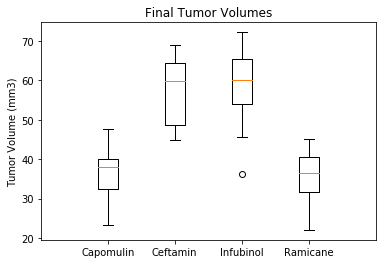

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()

ax.set_title('Final Tumor Volumes')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(most_promising_drugs)

ax.boxplot(capomulin_df['Tumor Volume (mm3)'])
ax.boxplot(ceftamin_df['Tumor Volume (mm3)'], positions=[1.5])
ax.boxplot(infubinol_df['Tumor Volume (mm3)'], positions=[2])
ax.boxplot(ramicane_df['Tumor Volume (mm3)'], positions=[2.5])

plt.show()

## Line and scatter plots

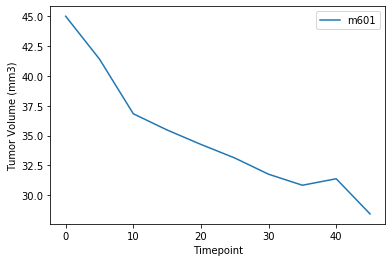

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
random_capomulin = capomulin_df.sample(n=1)
random_capomulin_id = random_capomulin.iloc[0]['Mouse ID']
random_capomulin_df = merged_df.query("`Mouse ID` == @random_capomulin_id")

fig, ax = plt.subplots()
ax.plot(random_capomulin_df['Timepoint'], random_capomulin_df['Tumor Volume (mm3)'], label=random_capomulin_id)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')

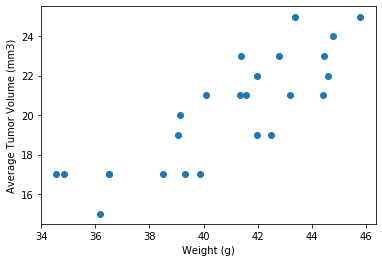

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg_tumor = merged_df.query("`Drug Regimen` == 'Capomulin'").groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
capomulin_weight_df = mouse_metadata.query("`Drug Regimen` == 'Capomulin'")
capomulin_weight_df.sort_values("Mouse ID", inplace=True)
weight = capomulin_weight_df.loc[:, 'Weight (g)']

plt.scatter(capomulin_avg_tumor, weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between both factors is 0.84


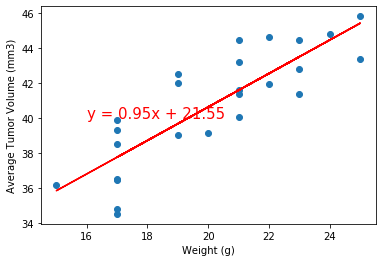

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, capomulin_avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, capomulin_avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,capomulin_avg_tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(16,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()